In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from datetime import timedelta

In [21]:
df = pd.read_csv("cleaned_chatelet.csv")
df['DATE']

0        2022-10-10 00:00:00+00:00
1        2022-10-09 23:00:00+00:00
2        2022-10-09 22:00:00+00:00
3        2022-10-09 21:00:00+00:00
4        2022-10-09 20:00:00+00:00
                   ...            
49214    2013-01-01 05:00:00+00:00
49215    2013-01-01 04:00:00+00:00
49216    2013-01-01 03:00:00+00:00
49217    2013-01-01 02:00:00+00:00
49218    2013-01-01 01:00:00+00:00
Name: DATE, Length: 49219, dtype: object

In [3]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [4]:
df.loc[0,'DATE'].strftime('%y-%m-%d %a %H:%M:%S')

'22-09-29 Thu 01:00:00'

In [5]:
df.loc[28,'DATE'].strftime('%m')

'09'

In [6]:
df['year']=df['DATE'].apply(lambda x: x.strftime('%y'))
df['month']=df['DATE'].apply(lambda x: x.strftime('%m'))
df['day']=df['DATE'].apply(lambda x: x.strftime('%d'))
df['week_day']=df['DATE'].apply(lambda x: x.strftime('%a'))
df['hour']=df['DATE'].apply(lambda x: x.strftime('%H'))

In [9]:
week_day_match = {'Thu':4, 'Wed':3, 'Tue':2, 'Mon':1, 'Sun':7, 'Sat':6, 'Fri':5}

In [11]:
df=df.replace({'week_day':week_day_match})

0        4
1        4
2        3
3        3
4        3
        ..
64693    2
64694    2
64695    2
64696    2
64697    2
Name: week_day, Length: 64698, dtype: int64

In [12]:
df.columns

Index(['DATE', 'NO', 'NO2', 'PM10', 'CO2', 'TEMP', 'HUMI', 'year', 'month',
       'day', 'week_day', 'hour'],
      dtype='object')

In [93]:
df

,DATE,NO,NO2,PM10,CO2,TEMP,HUMI,year,month,day,week_day,hour
0,2022-09-29 01:00:00+00:00,5.0,7.0,20.0,444.0,18.8,47.6,22,09,29,Thu,01
1,2022-09-29 00:00:00+00:00,3.0,23.0,11.0,450.0,17.8,50.0,22,09,29,Thu,00
2,2022-09-28 23:00:00+00:00,6.0,32.0,36.0,491.0,18.0,49.3,22,09,28,Wed,23
3,2022-09-28 22:00:00+00:00,4.0,28.0,39.0,526.0,18.1,46.8,22,09,28,Wed,22
4,2022-09-28 21:00:00+00:00,2.0,18.0,36.0,571.0,18.2,43.5,22,09,28,Wed,21
...,...,...,...,...,...,...,...,...,...,...,...,...
64693,2013-01-01 05:00:00+00:00,4.0,26.0,102.0,622.0,21.2,45.9,13,01,01,Tue,05
64694,2013-01-01 04:00:00+00:00,3.0,25.0,85.0,715.0,21.6,45.8,13,01,01,Tue,04
64695,2013-01-01 03:00:00+00:00,4.0,27.0,124.0,799.0,21.8,47.0,13,01,01,Tue,03
64696,2013-01-01 02:00:00+00:00,6.0,30.0,166.0,800.0,21.6,47.3,13,01,01,Tue,02


## Except Year, which has a linear relationship with NO/NO2.. Every other time should be treated as categorical
Month, Day of the Month, Day of the week and Hour

In [14]:
month_one_hot = pd.get_dummies(df.month, prefix='month')
day_one_hot = pd.get_dummies(df.day, prefix='day')
week_day_one_hot = pd.get_dummies(df.week_day, prefix='week_day')
hour_one_hot = pd.get_dummies(df.hour, prefix='hour')
df = df.join(month_one_hot)
df = df.join(day_one_hot)
df = df.join(week_day_one_hot)
df = df.join(hour_one_hot)

In [15]:
df.columns

Index(['DATE', 'NO', 'NO2', 'PM10', 'CO2', 'TEMP', 'HUMI', 'year', 'month',
       'day', 'week_day', 'hour', 'month_01', 'month_02', 'month_03',
       'month_04', 'month_05', 'month_06', 'month_07', 'month_08', 'month_09',
       'month_10', 'month_11', 'month_12', 'day_01', 'day_02', 'day_03',
       'day_04', 'day_05', 'day_06', 'day_07', 'day_08', 'day_09', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31',
       'week_day_1', 'week_day_2', 'week_day_3', 'week_day_4', 'week_day_5',
       'week_day_6', 'week_day_7', 'hour_00', 'hour_01', 'hour_02', 'hour_03',
       'hour_04', 'hour_05', 'hour_06', 'hour_07', 'hour_08', 'hour_09',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', '

In [16]:
df.to_csv("chatelet_for_prediction.csv")

In [17]:
df["DATE"]=df["DATE"].dt.date
test_df = df[df["DATE"]>max(df["DATE"])-timedelta(days=100)]
train_df = df[df["DATE"]<max(df["DATE"])-timedelta(days=100)]

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

For predicting NO
The MAE for training data is : 15.940375892431792
The MAE for test data is : 9.689479076375033
The MAPE for training data is : 2.7049470568544036
The MAPE for test data is : 14.573198141087579
For predicting NO2
The MAE for training data is : 8.653152709542805
The MAE for test data is : 11.026452111981715
The MAPE for training data is : 0.26487171618786254
The MAPE for test data is : 0.44422133746940423
For predicting PM10
The MAE for training data is : 45.41293415040451
The MAE for test data is : 34.27340665567649
The MAPE for training data is : 0.6103970761674077
The MAPE for test data is : 0.580751003069186
For predicting CO2
The MAE for training data is : 52.53103279125851
The MAE for test data is : 65.98804086598369
The MAPE for training data is : 0.09136292490076867
The MAPE for test data is : 0.1484270467189122
For predicting TEMP
The MAE for training data is : 1.45385971893924
The MAE for test data is : 1.4603869175225703
The MAPE for training data is : 0.0708

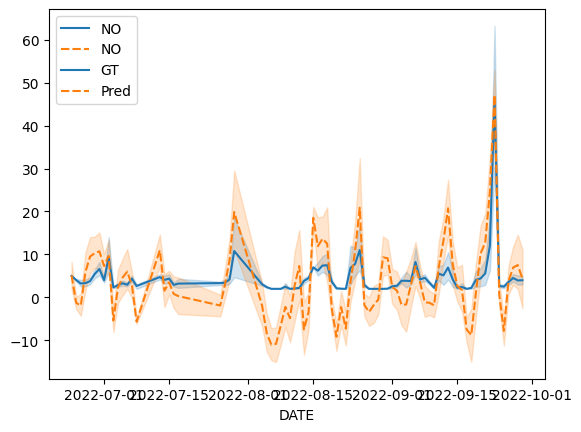

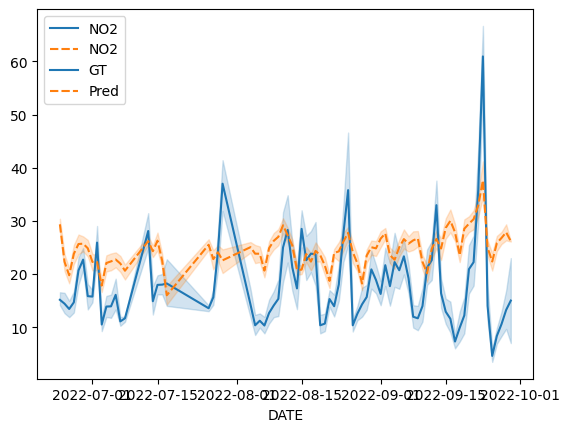

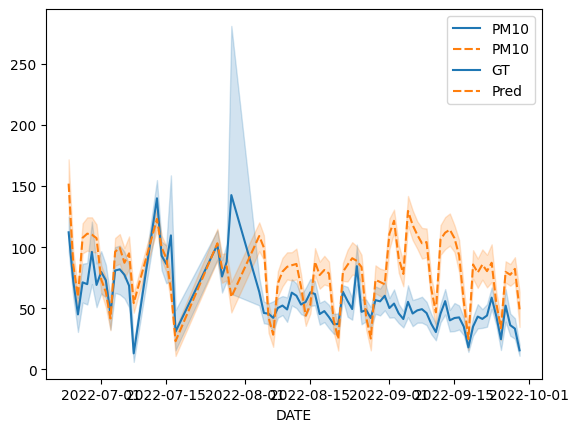

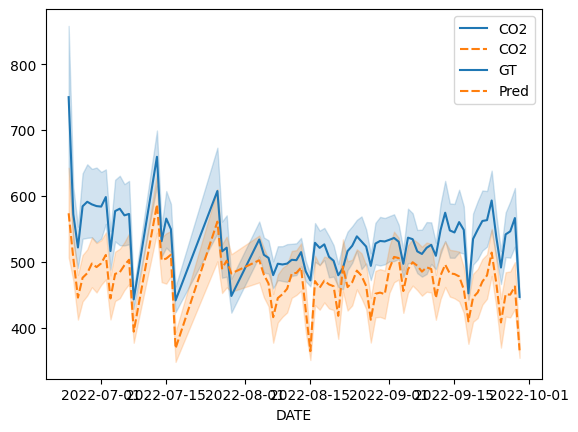

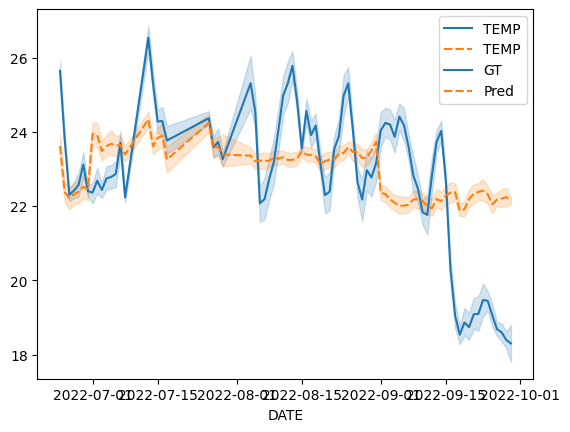

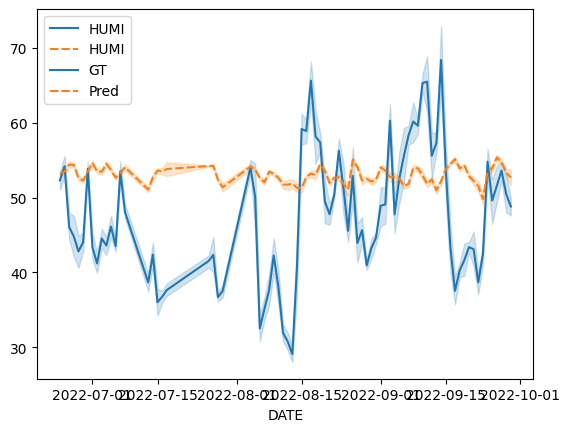

In [20]:
from cProfile import label


# train_x = train_df[['year', 'month',
#        'day', 'hour', 'month_01', 'month_02', 'month_03',
#        'month_04', 'month_05', 'month_06', 'month_07', 'month_08', 'month_09',
#        'month_10', 'month_11', 'month_12', 'day_01', 'day_02', 'day_03',
#        'day_04', 'day_05', 'day_06', 'day_07', 'day_08', 'day_09', 'day_10',
#        'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
#        'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
#        'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31',
#        'week_day_Fri', 'week_day_Mon', 'week_day_Sat', 'week_day_Sun',
#        'week_day_Thu', 'week_day_Tue', 'week_day_Wed', 'hour_00', 'hour_01',
#        'hour_02', 'hour_03', 'hour_04', 'hour_05', 'hour_06', 'hour_07',
#        'hour_08', 'hour_09', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
#        'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
#        'hour_20', 'hour_21', 'hour_22', 'hour_23']]
# test_x = test_df[['year', 'month',
#        'day', 'hour', 'month_01', 'month_02', 'month_03',
#        'month_04', 'month_05', 'month_06', 'month_07', 'month_08', 'month_09',
#        'month_10', 'month_11', 'month_12', 'day_01', 'day_02', 'day_03',
#        'day_04', 'day_05', 'day_06', 'day_07', 'day_08', 'day_09', 'day_10',
#        'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
#        'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
#        'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31',
#        'week_day_Fri', 'week_day_Mon', 'week_day_Sat', 'week_day_Sun',
#        'week_day_Thu', 'week_day_Tue', 'week_day_Wed', 'hour_00', 'hour_01',
#        'hour_02', 'hour_03', 'hour_04', 'hour_05', 'hour_06', 'hour_07',
#        'hour_08', 'hour_09', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
#        'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
#        'hour_20', 'hour_21', 'hour_22', 'hour_23']]

for target in ['NO', 'NO2', 'PM10', 'CO2', 'TEMP', 'HUMI']:
    train_y = train_df[target]
    test_y = test_df[target]
    train_x = train_df.drop(columns=["DATE",target])
    test_x = test_df.drop(columns=["DATE",target])
    model = LinearRegression()
    model.fit(train_x, train_y)
    train_data_predictions = model.predict(train_x)
    test_data_predictions = model.predict(test_x)
    # rsquared_error
    print("For predicting",target)
    print(f"The MAE for training data is : {mean_absolute_error(train_data_predictions, train_y)}")
    print(f"The MAE for test data is : {mean_absolute_error(test_data_predictions, test_y)}")
    print(f"The MAPE for training data is : {mean_absolute_percentage_error(train_data_predictions, train_y)}")
    print(f"The MAPE for test data is : {mean_absolute_percentage_error(test_data_predictions, test_y)}")
    test_compare_df = pd.DataFrame({"GT":np.array(test_y),"Pred":test_data_predictions},index=test_df['DATE'])
    plt.figure()
    sns.lineplot(data=test_compare_df,label=target)


In [106]:
train_x

,year,month,day,hour,month_01,month_02,month_03,month_04,month_05,month_06,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
1772,22,06,09,00,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1773,22,06,08,23,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1774,22,06,08,22,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1775,22,06,08,21,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1776,22,06,08,20,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64693,13,01,01,05,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64694,13,01,01,04,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64695,13,01,01,03,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64696,13,01,01,02,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot: xlabel='DATE'>

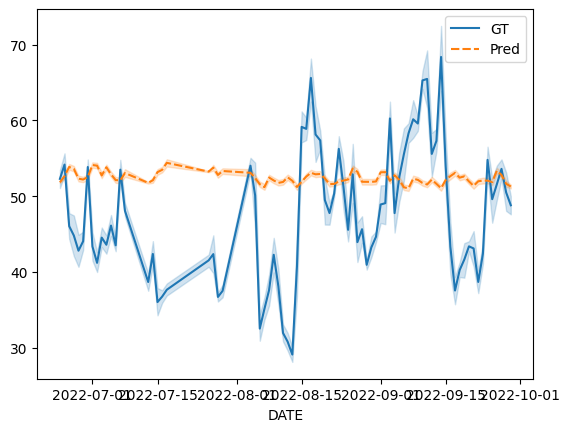

In [101]:
test_compare_df = pd.DataFrame({"GT":np.array(test_y),"Pred":test_data_predictions},index=test_df['DATE'])
plt.figure()
